#### Low dimensional Decision Tree Regression

A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

Modified from: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

#### Import the necessary modules  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Create a random dataset

In [2]:
N=100
X = np.random.uniform(0,10,N).reshape(N,1)
noise=np.random.uniform(0,0.75,N).reshape(N,1)
y = np.sin(X)+noise
print(X.shape,y.shape)

(100, 1) (100, 1)


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("TRAINING SHAPES:",x_train.shape,y_train.shape)
print("TEST SHAPES:",x_test.shape,y_test.shape)

TRAINING SHAPES: (70, 1) (70, 1)
TEST SHAPES: (30, 1) (30, 1)


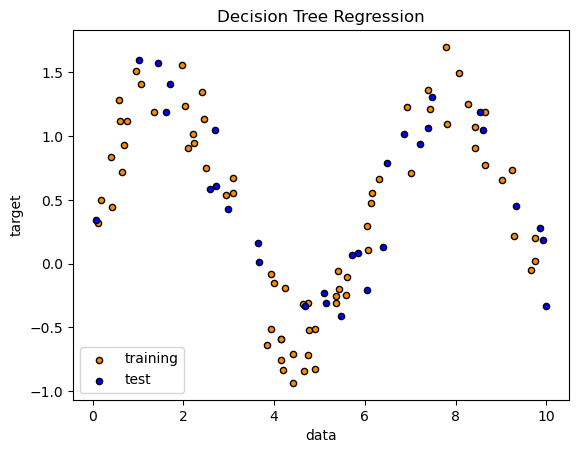

In [4]:
# # Plot the initial data
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.scatter(x_test, y_test, s=20, edgecolor="black", c="b", label="test")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


#### Fit regression model and predict

In [5]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_3 = DecisionTreeRegressor(max_depth=50)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)


y_1 = regr_1.predict(sorted(x_test))
y_2 = regr_2.predict(sorted(x_test))
y_3 = regr_3.predict(sorted(x_test))

#### Print results

In [6]:
from sklearn.metrics import mean_absolute_error
print("MODEL-1: Training, test MAE:",mean_absolute_error(y_train, regr_1.predict(x_train)),mean_absolute_error(y_test, regr_1.predict(x_test)))
print("MODEL-2: Training, test MAE:",mean_absolute_error(y_train, regr_2.predict(x_train)),mean_absolute_error(y_test, regr_2.predict(x_test)))
print("MODEL-3: Training, test MAE:",mean_absolute_error(y_train, regr_3.predict(x_train)),mean_absolute_error(y_test, regr_3.predict(x_test)))


# from sklearn.metrics import mean_absolute_percentage_error
# print("MODEL-1: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_1.predict(x_train)),mean_absolute_percentage_error(y_test, regr_1.predict(x_test)))
# print("MODEL-2: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_2.predict(x_train)),mean_absolute_percentage_error(y_test, regr_2.predict(x_test)))
# print("MODEL-3: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_3.predict(x_train)),mean_absolute_percentage_error(y_test, regr_3.predict(x_test)))

# from sklearn.metrics import mean_squared_error
# print("MODEL-1: Training, test MSE:",mean_squared_error(y_train, regr_1.predict(x_train)),mean_squared_error(y_test, regr_1.predict(x_test)))
# print("MODEL-2: Training, test MSE:",mean_squared_error(y_train, regr_2.predict(x_train)),mean_squared_error(y_test, regr_2.predict(x_test)))
# print("MODEL-3: Training, test MSE:",mean_squared_error(y_train, regr_3.predict(x_train)),mean_squared_error(y_test, regr_3.predict(x_test)))

MODEL-1: Training, test MAE: 0.2963018047228259 0.408865855002271
MODEL-2: Training, test MAE: 0.16713363663414338 0.23890716529852749
MODEL-3: Training, test MAE: 0.0 0.2677856122362877


#### Plot training results

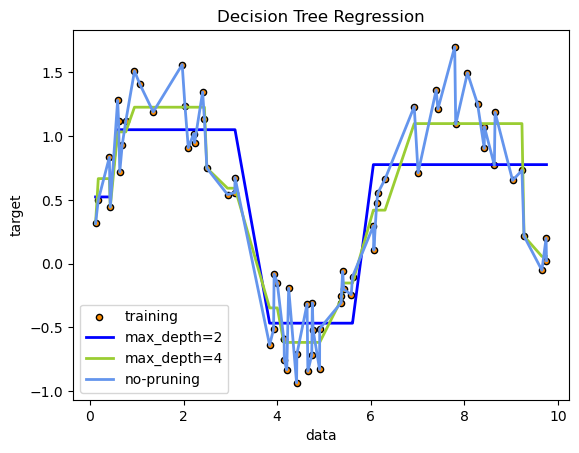

In [7]:
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.plot(sorted(x_train), regr_1.predict(sorted(x_train)), color="b", label="max_depth=2", linewidth=2)
plt.plot(sorted(x_train), regr_2.predict(sorted(x_train)), color="yellowgreen", label="max_depth=4", linewidth=2)
plt.plot(sorted(x_train), regr_3.predict(sorted(x_train)), color="cornflowerblue", label="no-pruning", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Plot test results


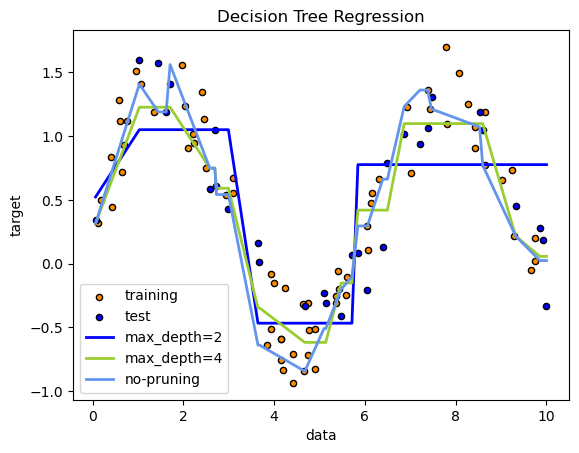

In [8]:
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.scatter(x_test, y_test, s=20, edgecolor="black", c="b", label="test")
plt.plot(sorted(x_test), y_1, color="b", label="max_depth=2", linewidth=2)
plt.plot(sorted(x_test), y_2, color="yellowgreen", label="max_depth=4", linewidth=2)
plt.plot(sorted(x_test), y_3, color="cornflowerblue", label="no-pruning", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Plot tree

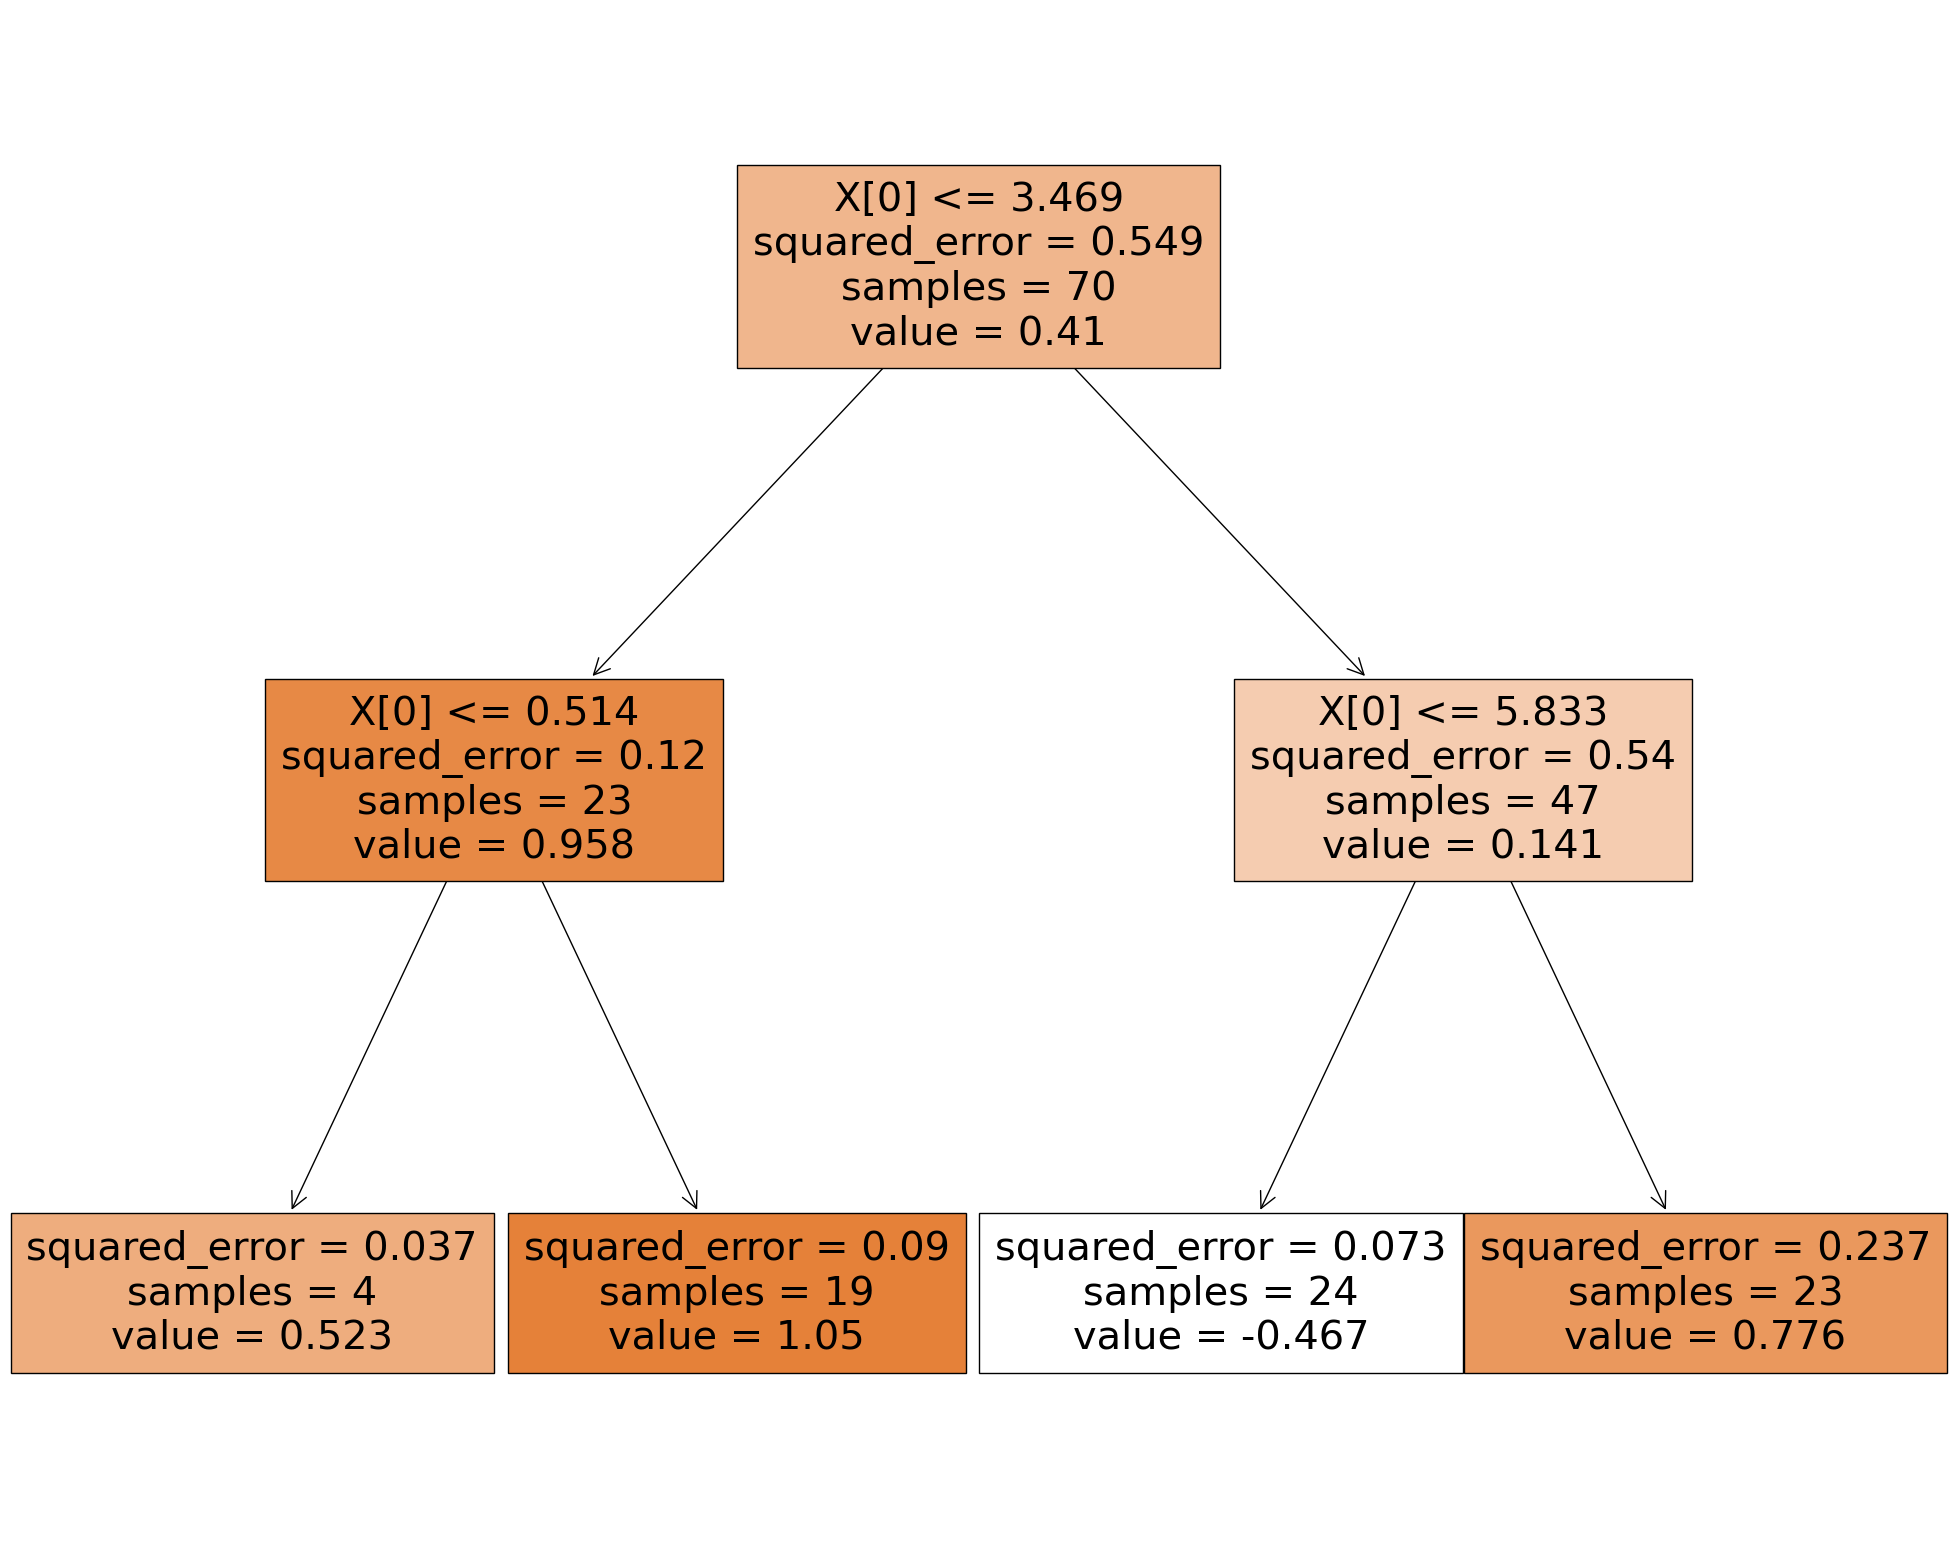

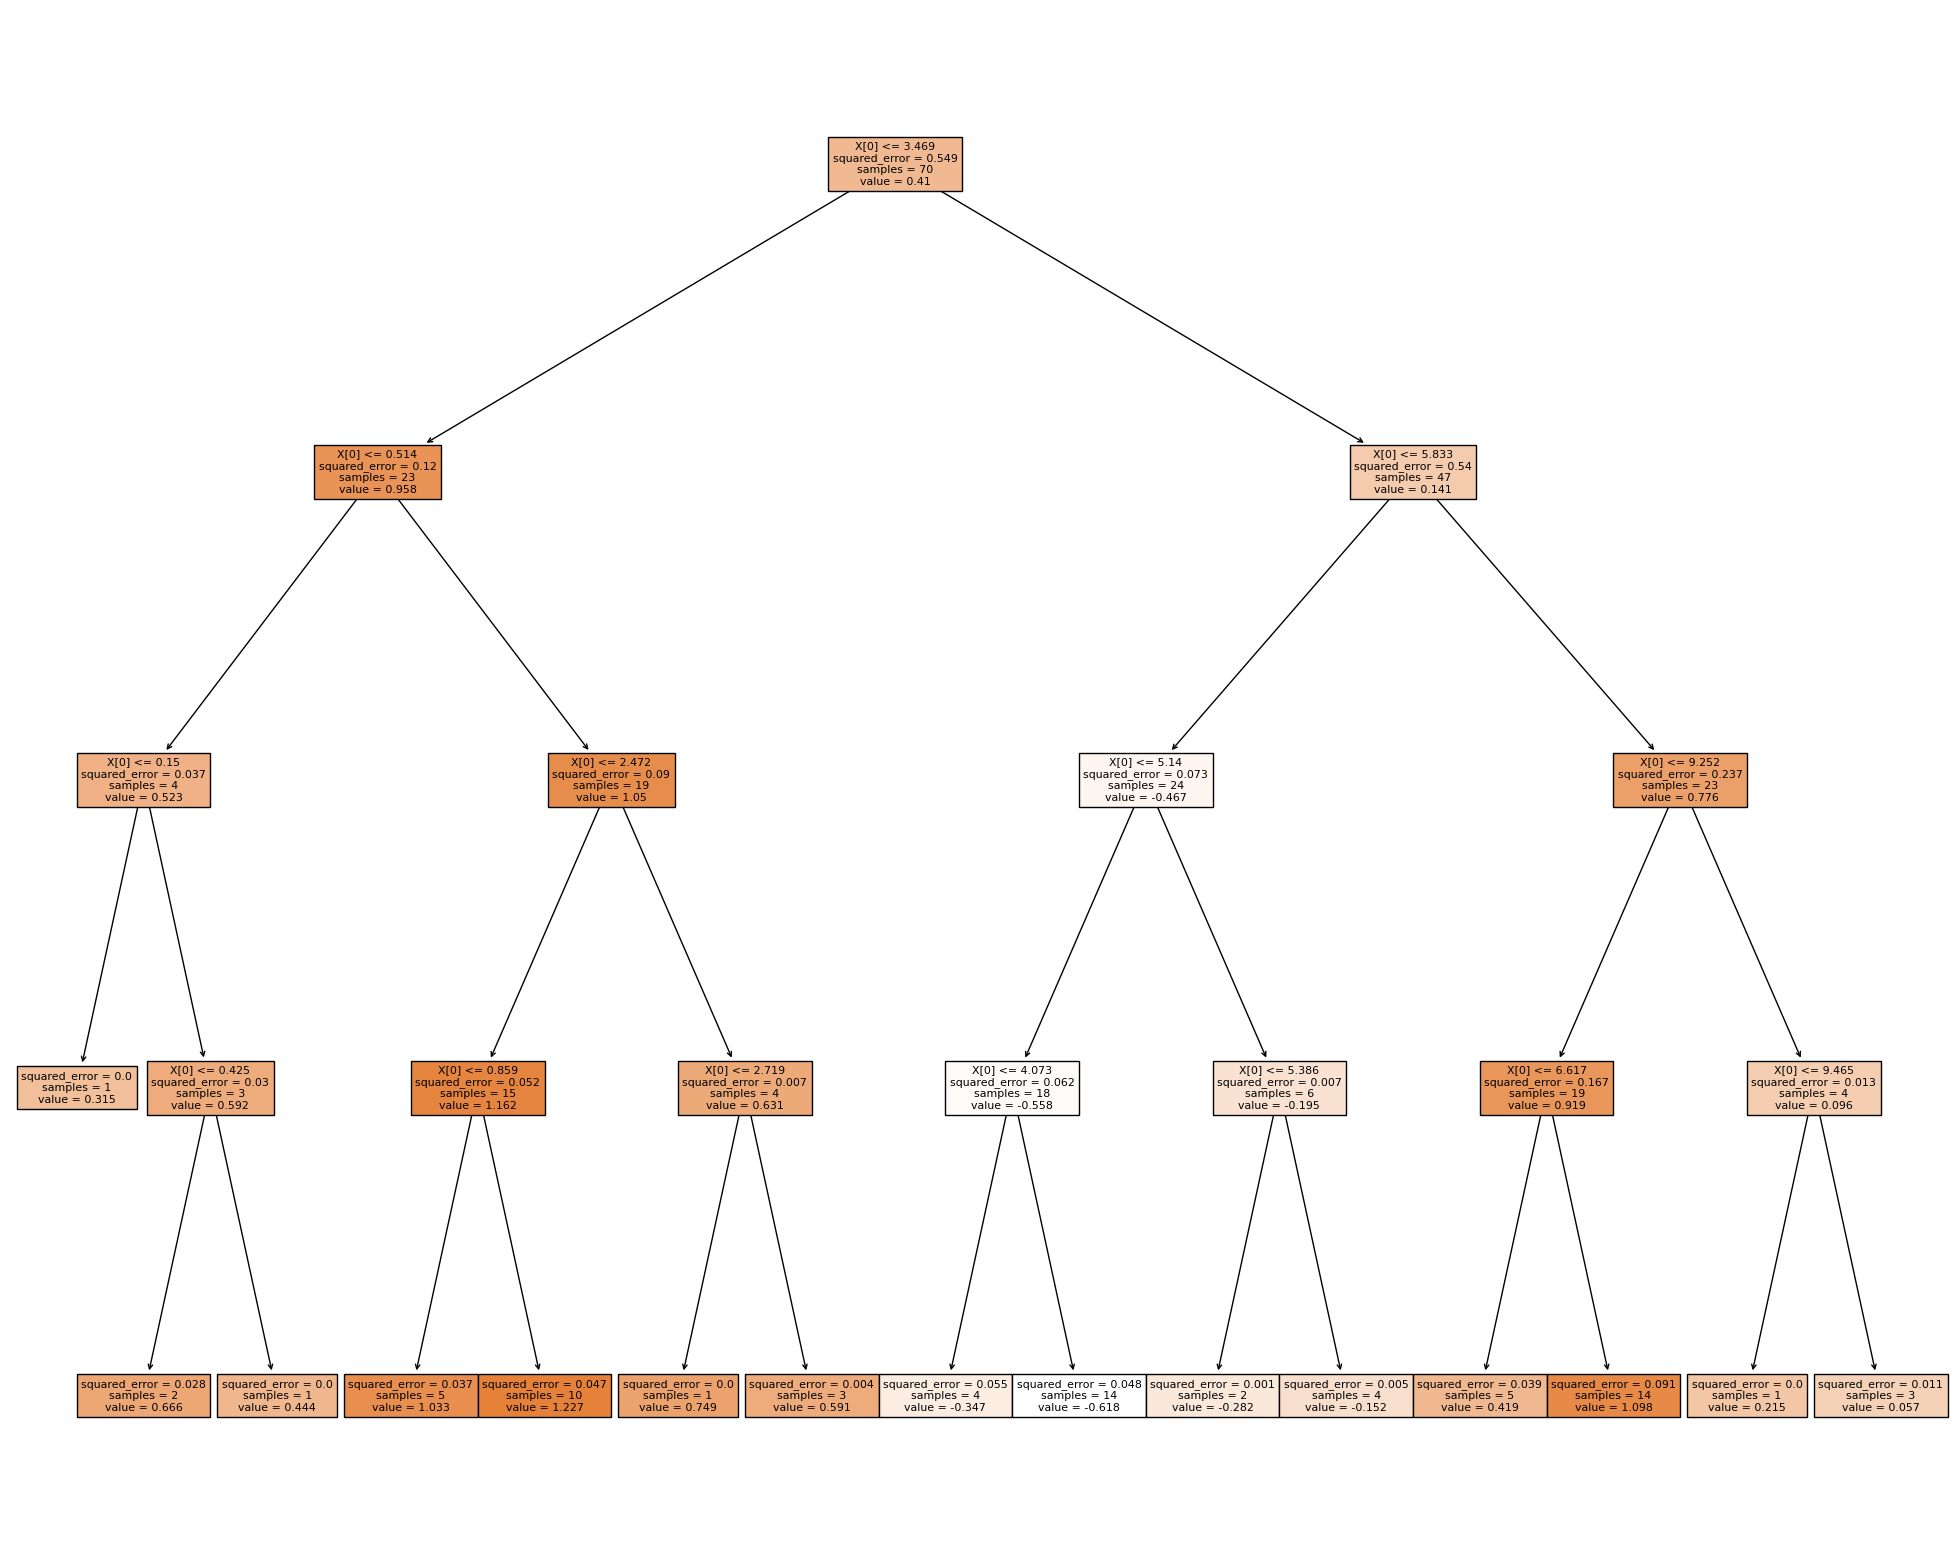

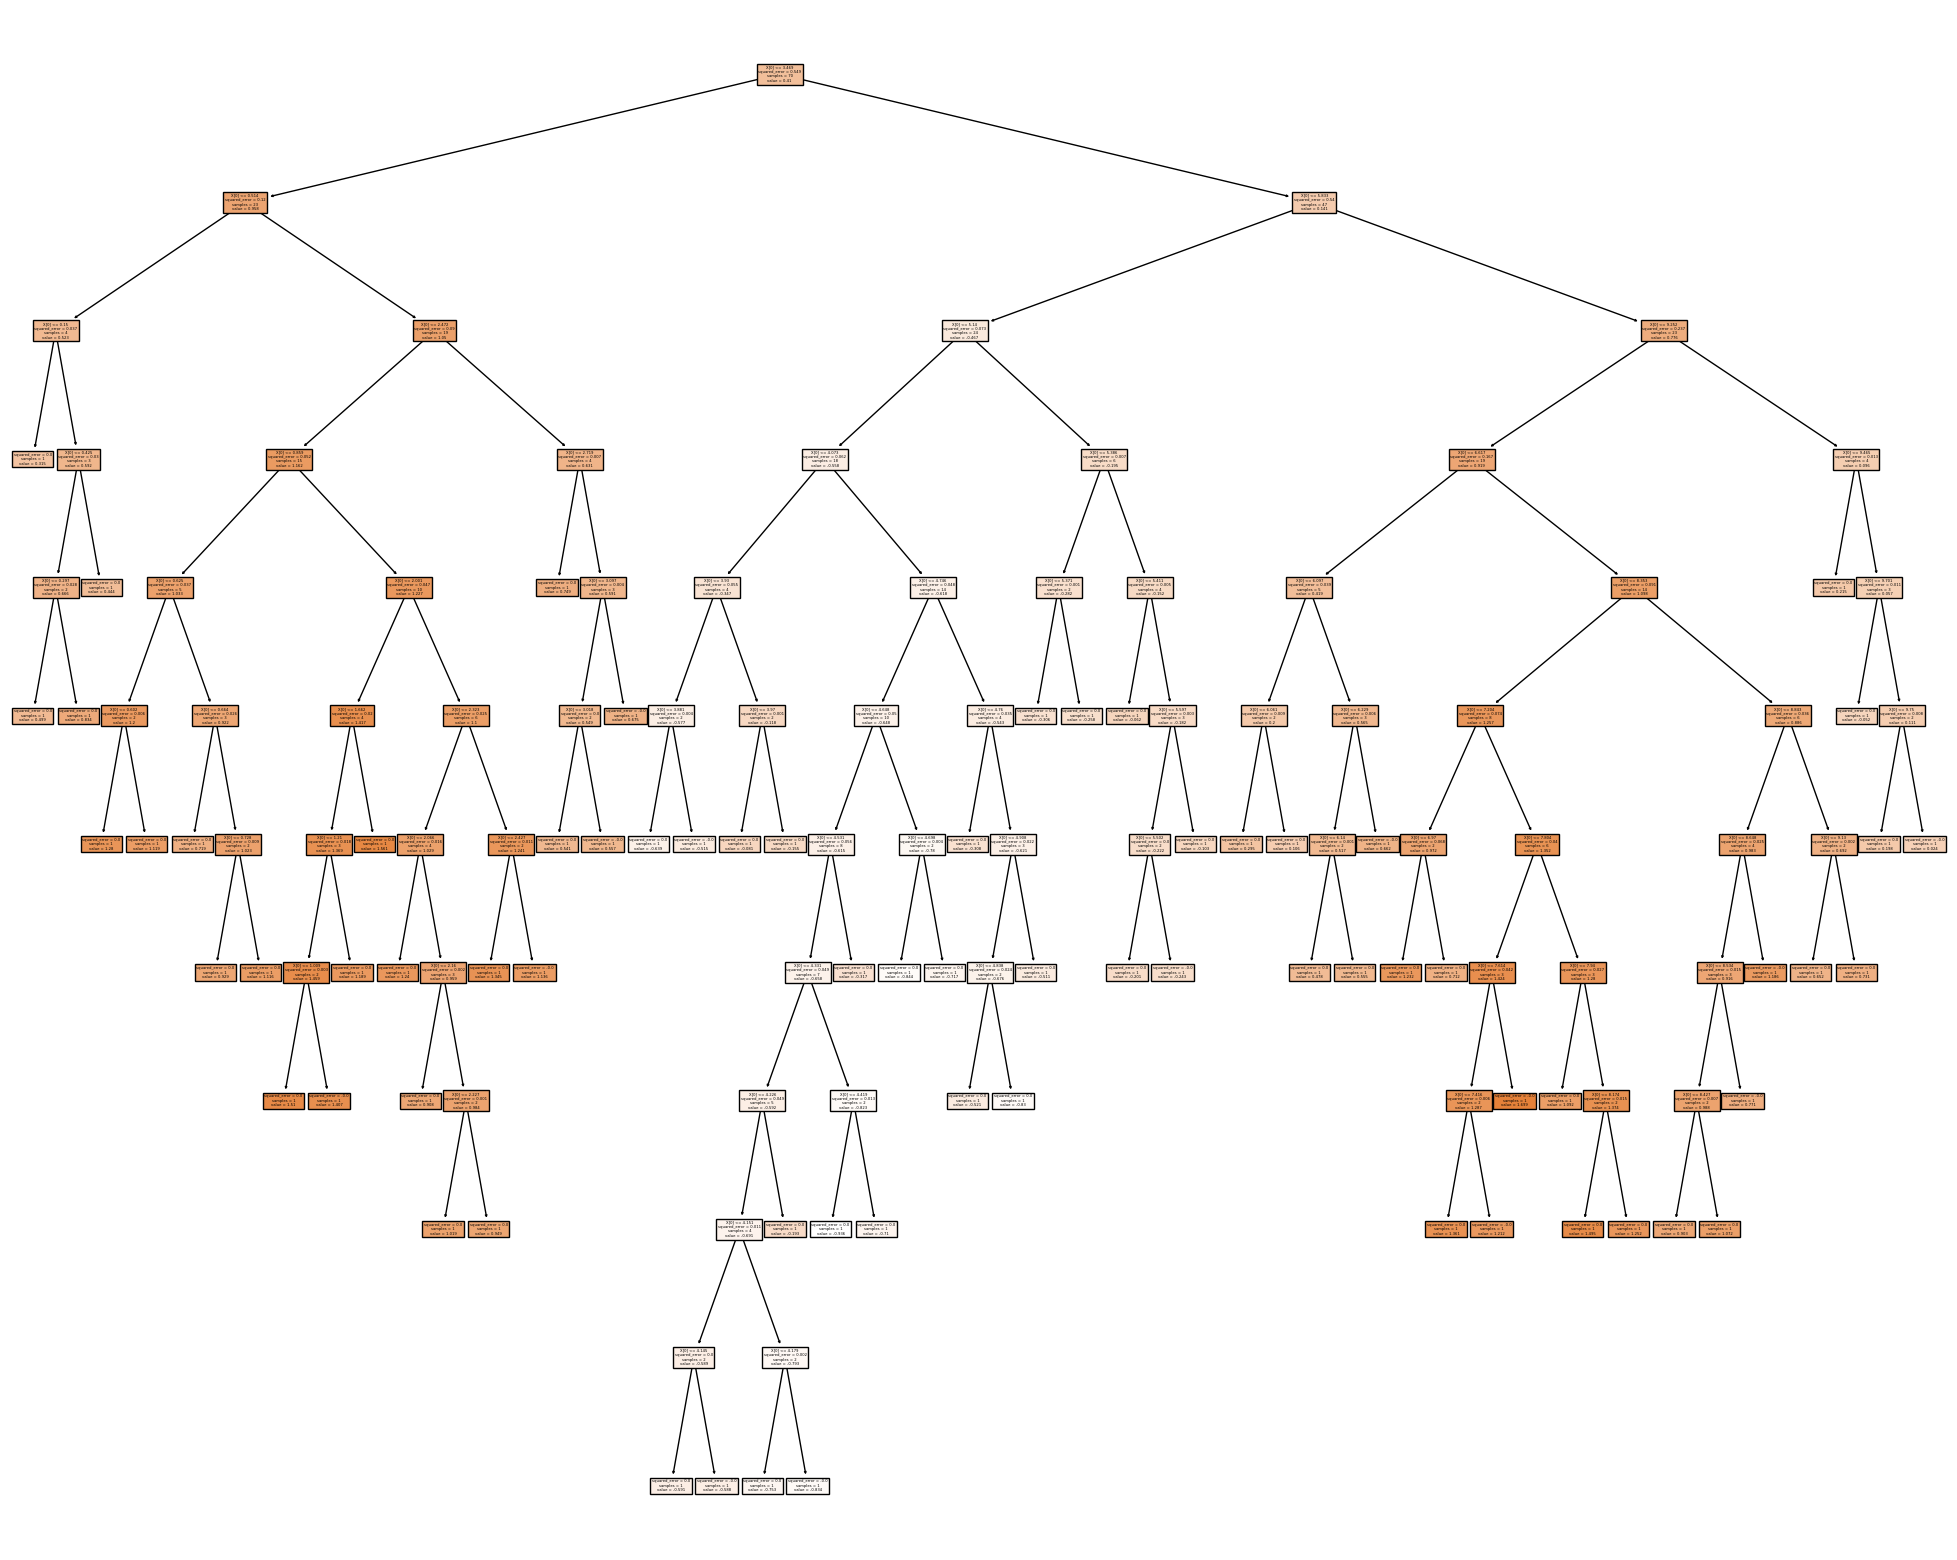

In [9]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

plot_tree(regr_1)
plot_tree(regr_2)
plot_tree(regr_3)
